In [1]:
!python --version

Python 3.9.1


<img src="Data/UP Data Science Society Logo 2.png" width=700>

# [2.5] Other Applications of Numpy (Curve Fitting and Linear algebra)
**Prepared by:**

- Michael Adrian Javier
- Dexter To


**Topics to cover:**

- Curve fitting of polynomials
- Basic linear algebra
- Eigenvalue and eigenvectors

**Weekly Objectives:**

- Fit a polynomial passing through a set of points
- Learn how to use the basics of the linear algebra module in NumPy
- Apply linear algebra concepts to real-life problems

**References:**
- [Python documentation](https://docs.python.org/3/)
- [(Ivezic, Connolly, Vanderplas, Gray) Statistics, Data Mining, and Machine Learning in Astronomy](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy)
- [W3Schools: Python Data Types](https://www.w3schools.com/python/python_datatypes.asp)
- Howard Anton & Chris Rorres, Elementary Linear Algebra | Applications version
- [Linear algebra practice exercises](https://www.math.ucdavis.edu/~daddel/linear_algebra_appl/Applications/cryptography/cryptograph_9_17/node6.html)
- [A Mathematical Analysis of the New Echoes Set - Genshin Impact](https://www.reddit.com/r/Genshin_Impact/comments/tsltkc/a_mathematical_analysis_of_the_new_echoes_set_20/)

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

## I. Curve fitting

Curve fitting, also known as regression analysis, is a statistical method used to find the best-fitting curve or mathematical function that describes the relationship between two or more variables. Curve fitting is widely used in many fields because it allows researchers to analyze and interpret data, make predictions, and understand the underlying relationships between variables.

Here we are gonna use the function by Numpy [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) which fits a $n$th degree polynomial to data. Although this is an inferior substitute to Scipy's [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) but this will be the focus of this part of the module. The syntax to fit an `n`th degree polynomial to `x_data` and `y_data`.

<center>

`np.polyfit(x_data, y_data, n)`

</center>

This outputs an array `[p_n, p_n-1, ... p_1, p_0]` consisting of the coefficients of the $n$th degree polynomial $p_0 + p_1x + ... p_{n-1}x^{n-1} + p_nx^n$.

Say we have this data. Plotting this, we see that it vaguely looks like a linear relation.

Let's try to see if `np.polyfit` if it actually is.

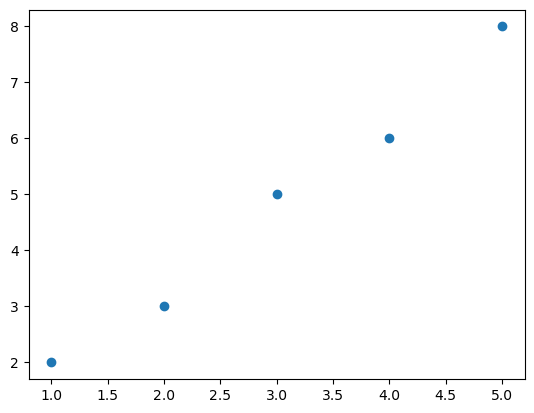

In [3]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 6, 8])
plt.scatter(x, y)

In [4]:
coeff = np.polyfit(x, y, 5)

C:\Users\Lanz\anaconda3\envs\astro_env\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


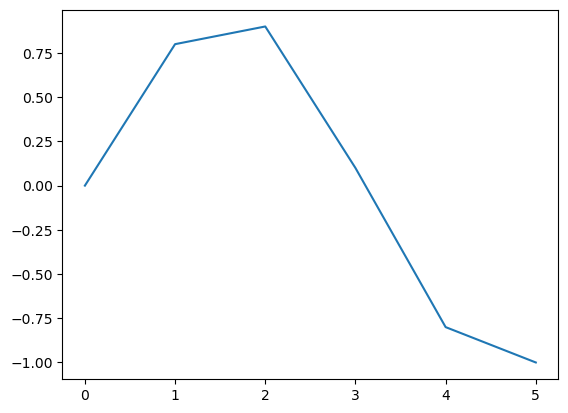

In [5]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
plt.plot(x, y)
coeff1 = np.polyfit(x, y, 3)

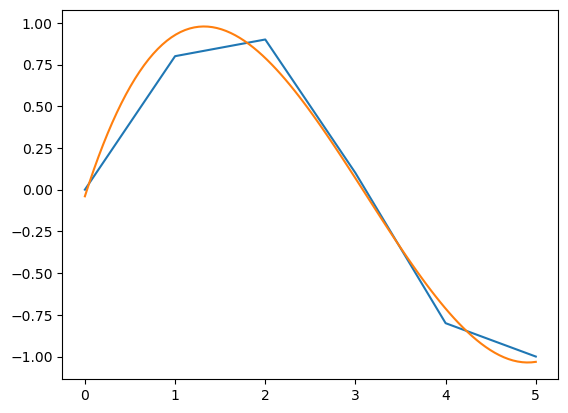

In [6]:
x0 = np.linspace(0, 5, 100)
def f(x):
  return coeff1[3] + coeff1[2]*x + coeff1[1]*x**2 + coeff1[0]*x**3

plt.plot(x, y)
plt.plot(x0, f(x0))

Let's see if we could make the fit better by having a polynomial of a larger degree.

In [7]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
coeff1 = np.polyfit(x, y, 3)
coeff2 = np.polyfit(x, y, 5)
coeff3 = np.polyfit(x, y, 7)

C:\Users\Lanz\anaconda3\envs\astro_env\lib\site-packages\IPython\core\interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


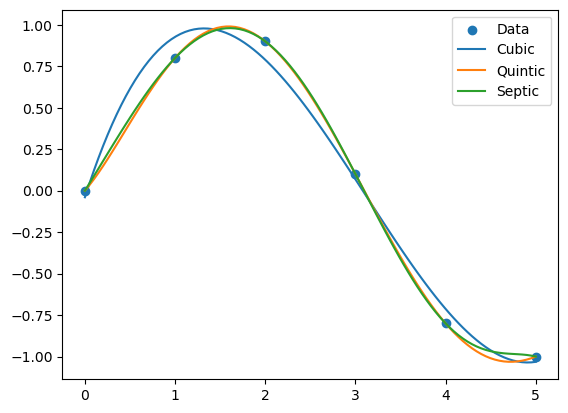

In [8]:
x0 = np.linspace(0, 5, 100)
def f(x):
  return coeff1[3] + coeff1[2]*x + coeff1[1]*x**2 + coeff1[0]*x**3
def f1(x):
  return coeff2[5] + coeff2[4]*x + coeff2[3]*x**2 + coeff2[2]*x**3 + coeff2[1]*x**4 + coeff2[0]*x**5
def f2(x):
  return coeff3[7] + coeff3[6]*x + coeff3[5]*x**2 + coeff3[4]*x**3 + coeff3[3]*x**4 + coeff3[2]*x**5 + coeff3[1]*x**6 + coeff3[0]*x**7
plt.scatter(x, y, label = 'Data')
plt.plot(x0, f(x0), label = 'Cubic')
plt.plot(x0, f1(x0), label = 'Quintic')
plt.plot(x0, f2(x0), label = 'Septic')
plt.legend()

and we see that the higher degree polynomials fit the data better! Let's check if the squared error supports our qualitative conclusions.

In [9]:
cubic = []
quintic = []
septic = []

for i in range(0, 6):
  cubic.append((y[i] - f(i))**2)
  quintic.append((y[i] - f1(i))**2)
  septic.append((y[i] - f2(i))**2)

print(" Cubic error: ", sum(cubic), "\n", "Quintic error: ", sum(quintic), "\n", "Septic error: ", sum(septic))

 Cubic error:  0.039682539682539666 
 Quintic error:  6.613271082569854e-28 
 Septic error:  1.0036688595915941e-28


And the squared error is indeed minimized! However, one polynomial might be more advantageous though than the other.

Let's try one more example! Let's try to fit our favorite trigometric function and see the meme $\sin x \approx x$ play out.

In [10]:
x0 = np.linspace(0, 7, 100)

csin = np.polyfit(x0, 10*np.sin(x0), 1)
csin1 = np.polyfit(x0, 10*np.sin(x0), 2)
csin2 = np.polyfit(x0, 10*np.sin(x0), 3)
csin3 = np.polyfit(x0, 10*np.sin(x0), 4)

- Let's make a function that plots the functions easily

In [11]:
def poly_plotter(x, coeff_list):
  empty = np.zeros_like(x) # Generates an empty array that have the same length as x
  n = len(coeff_list) - 1
  for i, coeff in enumerate(coeff_list):
    empty += coeff*np.power(x, n-i) # Adds the polynomial term by term
  return empty

In [12]:
sin_data = 10*np.sin(x0)
sin_linear = poly_plotter(x0, csin)
sin_quadratic = poly_plotter(x0, csin1)
sin_cubic = poly_plotter(x0, csin2)
sin_quartic = poly_plotter(x0, csin3)

sin_list = [sin_data, sin_linear, sin_quadratic, sin_cubic, sin_quartic]
labels = ['Sin', 'Linear', 'Quadratic', 'Cubic', 'Quartic']

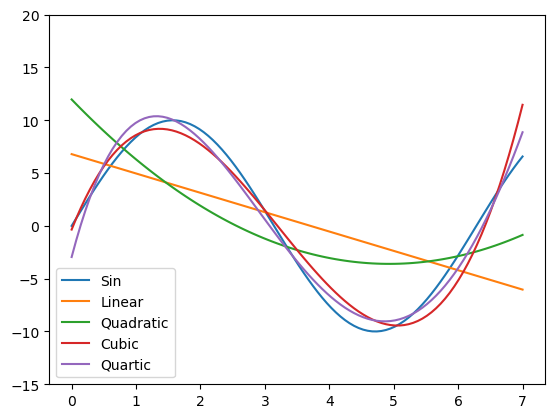

In [13]:
for i in range(5):
  plt.plot(x0, sin_list[i], label = labels[i])
plt.ylim([-15, 20])
plt.legend()

Now, we see that $\sin x \approx x$ is a dumb meme to joke about because people know that it doesn't hold for small $x$. However, see see that the larger degree polynomials fit the $\sin$ graph more!

**Exercise:** Solve for the error for each fit and argue which fit is the most efficient and accurate. (*This is also in the exercises section*)

However, be careful when fitting oscillatory functions like this. If we fit a $\sin$ function from $x = 0$ to $x = 15$, we might not get good fits. This is because NumPy's algorithm sees the oscillations in the sine wave as errors deviating from a number, and we might just get a straight line as the fit.

**Exercise:** See how the fit changes if we extend our domain to $x \in [0, 15]$. (*This is also in the exercises section*)

## II. Linear algebra

Linear algebra is the branch of math that deals with vectors, matrices, and their applications.

### A. Vectors

A vector with dimensions $N$ in Python (in our case in Numpy) is just an 1d array with length $N$. For example a vector given by

$$ \vec{v} = \langle 1, 2, 3 \rangle $$

can be represented in Numpy as

In [14]:
v = np.array([1, 2, 3])

Just like regular vectors, we can do linear operations to it such as addition, subtraction, and scalar multiplication. Say we have another vector $\vec{u} = \langle 3, 1, 5 \rangle$ and a constant $c = 4$. Then,

- $\vec{v} + \vec{u} = \langle 1, 2, 3 \rangle + \langle 3, 1, 5 \rangle = \langle 4, 3, 8 \rangle $
- $\vec{v} - \vec{u} = \langle 1, 2, 3 \rangle - \langle 3, 1, 5 \rangle = \langle -2, 1, -2 \rangle $
- $c\vec{u} = 4\langle 3, 1, 5 \rangle = \langle 12, 4, 20\rangle$

Let's see if Numpy gives the same results:

In [15]:
u = np.array([3, 1, 5])
c = 4

print(v + u, v - u, c*u)

[4 3 8] [-2  1 -2] [12  4 20]


and we see that it does the things that we expected! This is because all of the operations that de did are done element-wise, and Numpy arrays are computed the same way.

### B. Matrices

Matrices in NumPy are just 2d arrays (as expected). An $n\times m$ matrix is just a Numpy array with shape `(n,m)`. For example, the matrices $M$ and $N$

$$ M = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}, \quad N = \begin{pmatrix}
0 & -2 & 1 \\
1 & 2 & 0 \\
4 & 1 & 0
\end{pmatrix} $$

are  written in NumPy as:

In [16]:
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
N = np.array([[0, -2, 1], [1, 2, 0], [4, 1, 0]])

As we can see, matrices are just an array of row vectors! The rows `1 2 3`, `4 5 6`, and `7 8 9` are grouped in an array to form `M`. `N` is written in the same way.

We can then check what $M+N$ and  $M-N$ looks like.

In [17]:
print(M+N, "\n", M-N)

[[ 1  0  4]
 [ 5  7  6]
 [11  9  9]] 
 [[1 4 2]
 [3 3 6]
 [3 7 9]]


However, doing the usual matrix product doesn't yield the correct answer. Because we know that

$$ MN = \begin{pmatrix}
14 & 5 & 1 \\
29 & 8 & 4 \\
44 & 11 & 7
\end{pmatrix} $$

In [18]:
print(M*N)

[[ 0 -4  3]
 [ 4 10  0]
 [28  8  0]]


This is because, again, array operations are done element-wise, but matrix multiplication doesn't work that way. We can either use:
- [`np.matmul(M, N)`](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)
- `M@N`

and both of them work fine.

In [19]:
print(np.matmul(M, N))

[[14  5  1]
 [29  8  4]
 [44 11  7]]


In [20]:
print(M@N)

[[14  5  1]
 [29  8  4]
 [44 11  7]]


All the other matrix operations that can be done on a matrix $M$ are:

- transpose [`M.T`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html)
- inverse [`np.linalg.inv(M) = la.inv(M)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)
- conjugate [`np.conjugate(M)`](https://numpy.org/doc/stable/reference/generated/numpy.conjugate.html)

### C. Special matrices

These aren't really special in their own right, they're just there to make our lives easier.

Our favorite identity matrix can be useful in certain situations! An $n\times n$ matrix is made using the command `np.ones(n)`.

In [21]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

But, say we want to make an $m\times n$ matrix full of zeroes, we can use the command `np.zeros([m, n])`.

In [22]:
np.zeros([2, 3])

array([[0., 0., 0.],
       [0., 0., 0.]])

If we say want it to be full of ones instead, we can use the command `np.ones([m, n])`! Diagonal matrices can be made by inputting a list in the command `np.diag(list or array)`.

In [23]:
a = [1, 4, 6, 7]
np.diag(a)

array([[1, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 6, 0],
       [0, 0, 0, 7]])

However, what if we want a matrix that copies either a number or an array? We can use `np.full(array)`. If we want to make

$$ \begin{pmatrix}
2 & 2 & 2 \\
2 & 2 & 2 \\
2 & 2 & 2
\end{pmatrix} $$

We also have to specify the size of the matrix in the first argument.

In [24]:
np.full([3, 3], 2)

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

But you may think, can't this be done easily with `2*np.ones([3, 3])`? And you're right.  However, a better example that shows the power of `np.full` is if we want a matrix that looks like
$$ \begin{pmatrix}
1 & 2 \\
1 & 2 \\
1 & 2 \\
1 & 2
\end{pmatrix} $$

This is a $4\times2$ matrix with rows `1 2` copied all over. This can be done with

In [25]:
np.full([4, 2], [1, 2])

array([[1, 2],
       [1, 2],
       [1, 2],
       [1, 2]])

Be careful though, make sure that the array you're copying can be broadcasted properly. If we copy our previous example but have rows `1 2 3`, Python screams at us.

To fix this we either need to have the previous code or have `np.full([4, 3], [1, 2, 3])` instead which would make
$$ \begin{pmatrix}
1 & 2 & 3 \\
1 & 2 & 3\\
1 & 2 & 3\\
1 & 2 & 3
\end{pmatrix} $$

Another special type of matrix is a sparse matrix, where most entries are zeroes except the diagonal, tridiagonal, pentadiagonal, etc. For example, a tridiagonal matrix looks something like this:

$$ \begin{pmatrix}
1 & 1 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 1 & 1
\end{pmatrix} $$

These are useful in some situations, such as the numerical solutions to the Schrodinger equation. However, this type of matrix is not within the scope of this course.

**Summary**

- [`np.eye(n)`](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) = creates an $n\times n$ identity matrix
- [`np.zeros([m, n])`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) = creates an $m\times n$ zero matrix
- [`np.ones([m, n])`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) = creates an $m\times n$ matrix full of 1's.
- [`np.diag(list)`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) = creates an $n\times n$ diagonal matrix whose diagonal elements are based on the list
- [`np.full([m, n], copied_element)`](https://numpy.org/doc/stable/reference/generated/numpy.full.html) = broadcasts a `copied_element` (number or array) to an $m\times n$ matrix

**Example**

Consider an alphabet association with numbers that looks like this:
<p align = 'center'>
<img src="https://www.math.ucdavis.edu/~daddel/linear_algebra_appl/Applications/cryptography/cryptograph_9_17/img13.gif" width=400>
</p>
<p align = 'center'>
<img src="https://www.math.ucdavis.edu/~daddel/linear_algebra_appl/Applications/cryptography/cryptograph_9_17/img14.gif" width=400>
</p>

However, if we wanna encode a message in a way that's not just adjusting the numbers, we can arrange the numbers in a column vector and multiply it by a certain matrix! Say we want the message

$$ \textit{UP DATA SCIENCE SOCIETY}$$

We can group the letters by four and form $4\times1$ vectors as

$$ \begin{pmatrix}
U \\
P \\
D \\
A \end{pmatrix}, \begin{pmatrix}
T \\
A \\
S \\
C \end{pmatrix}, \begin{pmatrix}
I \\
E \\
N \\
C \end{pmatrix}, \begin{pmatrix}
E \\
S \\
O \\
C \end{pmatrix}, \begin{pmatrix}
I \\
E \\
T \\
Y \end{pmatrix}$$

Transforming them as numbers with our system we get
$$ \begin{pmatrix}
41 \\
31 \\
7 \\
1 \end{pmatrix}, \begin{pmatrix}
39 \\
1 \\
37 \\
5 \end{pmatrix}, \begin{pmatrix}
17\\
9 \\
27 \\
5 \end{pmatrix}, \begin{pmatrix}
9 \\
37 \\
29 \\
5 \end{pmatrix}, \begin{pmatrix}
17 \\
9 \\
39 \\
49 \end{pmatrix}$$

We can then multiply it with a certain matrix $A$ that transforms our code. Say $A$ is given by
$$ A = \begin{pmatrix}
0 & 3 & 1 & -2 \\
4 & 1 & -3 & 0 \\
1 & -2 & 4 & 1 \\
0 & -1 & -2 & 0
\end{pmatrix} $$

Computing it using NumPy we get

In [26]:
A = np.array([[0, 3, 1, -2], [4, 1, -3, 0], [1, -2, 4, 1], [0, -1, -2, 0]])
v1 = np.array([[41], [31], [7], [1]])
v2 = np.array([[39], [1], [37], [5]])
v3 = np.array([[17], [9], [27], [5]])
v4 = np.array([[9], [37], [29], [5]])
v5 = np.array([[17], [9], [39], [49]])

print(np.ndarray.flatten(np.array([[A@v1], [A@v2], [A@v3], [A@v4], [A@v5]])))

[ 98 174   8 -45  30  46 190 -75  44  -4 112 -63 130 -14  56 -95 -32 -40
 204 -87]


Then, our encoded message is now then:

<center>

**98 174   8 -45  30  46 190 -75  44  -4 112 -63 130 -14  56 -95 -32 -40
 204 -87**

</center>

To decode the message, we just need to group the numbers again by four and multiply it by $A^{-1}$.

### D. Systems of linear equations

Solving systems of linear equations are the main applications of matrices. Say we have the system

$$ \begin{cases}
 x + 3y & = 7 \\
 4x - 5 & = 1
 \end{cases} $$

It can be easily transformed into the matrix equation

$$ \begin{pmatrix}
1 & 3 \\
4 & -5
\end{pmatrix} \begin{pmatrix} x \\
y \end{pmatrix} = \begin{pmatrix} 7 \\
1 \end{pmatrix} $$

which can be solved by having

$$ \begin{pmatrix} x \\
y \end{pmatrix} = \begin{pmatrix}
1 & 3 \\
4 & -5
\end{pmatrix}^{-1}\begin{pmatrix} 7 \\
1 \end{pmatrix} $$ 

But this can be easily solved using NumPy!

In [27]:
M = np.array([[1, 3], [4, -5]])
v = np.array([[7], [1]])

answer = la.inv(M) @ v
answer

array([[2.23529412],
       [1.58823529]])

The analytical solution is $\begin{pmatrix} \dfrac{38}{17} & \dfrac{27}{17} \end{pmatrix}^T \approx \begin{pmatrix} 2.2352941176 & 1.5882352941 \end{pmatrix}^T$, thus NumPy's answer is right!

However, this only work if you have $n$ equations and $n$ unknowns. If the number of equations and unknowns are not equal, we can do the reduced row echelon form method. There are no function for that in NumPy, however there are ones in some Python packages.

However, this is a boring example. Where did this linear system of equation come from? Let's look at example 1 to see a better application of this concept.

**Example**

The easiest application of solving linear system of equations is determining the curve that passes through a set of points. Say a quadratic passes through the points $(1,0), (0,1)$, and $(2,3)$. Give the equation of this quadratic.

**Solution:**

The general equation of a quadratic is $y = ax^2 + bx + c$, where we find the three unknowns $a$, $b$, and $c$. We can substitute the $(x, y)$ values to the equation of the quadratic and solve for them making a system of linear equations like this:

$$ \begin{cases}
a(1)^2 + b(1) + c = 1a + 1b + 1c & = 0 \\
a(0)^2 + b(0) + c = 0a + 0b + 1c & = 1 \\
a(2)^2 + b(2) + c = 4a + 2b + 1c & = 3
\end{cases} $$

$$ \begin{pmatrix}
1 & 1 & 1 \\
0 & 0 & 1 \\
4 & 2 & 1 \end{pmatrix} \begin{pmatrix} a \\
b \\
c \end{pmatrix} = \begin{pmatrix} 0 \\
1 \\
3 \end{pmatrix} $$

We can then solve for the equation of the quadratic like before:

In [28]:
M_quad = np.array([[1, 1, 1], [0, 0, 1], [4, 2, 1]])
v_quad = np.array([[0], [1], [3]])

coeff_quad = la.inv(M_quad) @ v_quad
coeff_quad

array([[ 2.],
       [-3.],
       [ 1.]])

Let's check if the coefficients we solved are right!

(-2.0, 10.0)

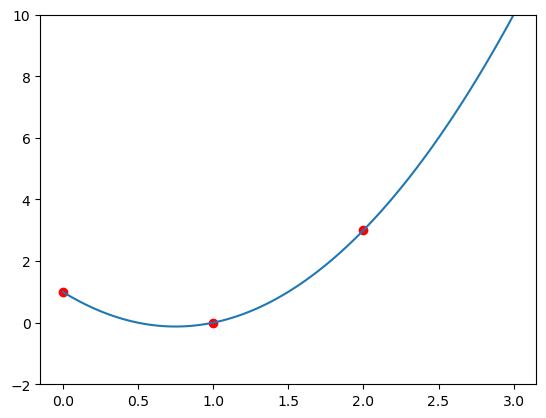

In [29]:
p1 = [[1], [0]]
p2 = [[0], [1]]
p3 = [[2], [3]]

x = np.linspace(0, 3, 100)
def quad(x):
  return coeff_quad[0, 0]*x**2 + coeff_quad[1, 0]*x + coeff_quad[2, 0]

plt.scatter(p1[0], p1[1], color = 'r')
plt.scatter(p2[0], p2[1], color = 'r')
plt.scatter(p3[0], p3[1], color = 'r')
plt.plot(x, quad(x))
plt.ylim([-2, 10])

### E. Eigenvalues and eigenvectors

One thing to know about matrices is that matrices are coordinate transformations. When a vector is multiplied by a vector, the resultant vector is actually the vector under the coordinate transformation. However, there are some vectors $\vec{v}$ that don't change their direction. They might be scaled by a constant $\lambda$ which relates all of these with the equation

$$ A\vec{v} = \lambda\vec{v}$$

where $A$ is the matrix. There is a whole process to compute this analytically, but this can be easily done using NumPy. To start off, the eigenvalues and eigenvectors of a square array `M` can be determined using the functions

- [`np.linalg.eigh(M)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html) or `la.eigh(M)` = only works for symmetric matrices and takes advantage of that symmetry, faster output
- [`np.linalg.eig(M)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) or `la.eig(M)` = works for general matrices (not just symmetric ones) but uses a slower algorithm

These two functions give the same outputs: the eigenvalues and the eigenvectors. Let's use `M_quad` from the previous example as our test matrix.

In [30]:
eigval, eigvec = la.eig(M_quad) # M_quad is not symmetric, so we use la.eig

print(' Eigenvalues: ', eigval, '\n', 'Eigenvectors: ', eigvec)

 Eigenvalues:  [ 3.56155281 -0.56155281 -1.        ] 
 Eigenvectors:  [[ 4.33744930e-01 -2.37794421e-01 -1.38777878e-16]
 [ 2.43570685e-01  8.46917390e-01  7.07106781e-01]
 [ 8.67489860e-01 -4.75588843e-01 -7.07106781e-01]]


But when are they really used? One example is for the rotation of conics.

**Example**

Determine the conic given by the equation $5x^{2}+6y^{2}+10xy-10=0$.

**Solution:**

With abuse of notation, the equation can be turned into a matrix equation like so:

$$ \begin{pmatrix} x & y \end{pmatrix} \begin{pmatrix} 5 & 5 \\
5 & 6 \end{pmatrix}\begin{pmatrix} x \\
y \end{pmatrix} - 10 = 0 $$

$$ \vec{x}^T M \vec{x} - 10 = 0$$

The matrix $M$ is the key to the problem. If we get the eigenvalues of $M$, we know the characteristic equation of the conic in the rotated $x'y'$ plane.

In [31]:
M_conic = np.array([[5, 5], [5, 6]])
eigval, eigvec = la.eig(M_conic)
print(eigval)

[ 0.47506219 10.52493781]


The eigenvalues tell us the coefficients of the conic in the $x'y'$ plane. Since $\lambda_1 \approx 0.475$ and $\lambda_2 \approx 10.525$, the equation is then given by

$$ 0.475 (x')^2 + 10.525(y')^2 - 10 = 0 $$

This can be made into the form

$$ \frac{(x')^2}{(\sqrt{0.475})^2} + \frac{(x')^2}{(\sqrt{1.0525})^2} = 1 $$

and we see immediately that it's an ellipse! Unfortunately, we can't plot the function in a straightforward way outside NumPy, but we can easily see that plotting it in Desmos gives an ellipse.

<p align = 'center'>
<img src="https://i.imgur.com/1g0sP9J.png" width=400>
</p>

# End of tutorial.

---

# Sample exercises

Try to solve exercises these exercises if you like.

## Exercise 1

Determine the equation of the polynomial passing through the points $(2,4), (0,0), (-1, 5), (4,6),$ and $(5,0)$. Find the answer using `np.polyfit` and using the linear algebra method. Are they the same? If not, how large is the error between the two?

## Exercise 2

Refer to the fitting of the $\sin$ function in the module for the next two questions.  

  a. Solve for the error of the $\sin$ fit and argue which is the most accurate but numerically efficient.

  b. See how the fit changes if we extend our domain to $x \in [0, 15]$.

## Exercise 3

Say we have the matrices $A$ and $B$ where $A$ consists of your student number (2)0Y_1Y_1-XXXX and birthday MM/DD/YYYY, and $B$ consists of your mother's birthday M1M1/D1D1/Y1Y1Y1Y1 and your father's birthday M2M2/D2D2/Y2Y2Y2Y2. Compute for $AB$ and diagonalize the matrix by computing for its eigenvalues and eigenvectors.

$$ A = \begin{pmatrix}
0 & Y_1 & Y_1 & X\\
X & X & X & X \\
M & M & D & D \\
Y & Y & Y & Y \end{pmatrix}, B = \begin{pmatrix}
M_1 & M_1 & D_1 & D_1 \\
Y_1 & Y_1 & Y_1 & Y_1 \\
M_2 & M_2 & D_2 & D_2 \\
Y_2 & Y_2 & Y_2 & Y_2 \end{pmatrix} $$

*Hint: Diagonalizing a matrix can be done using the formula $D = P^{-1}AP$ where $P$ is a matrix consisting of the eigenvectors of $AB$.*

## Exercise 4

Use $AB$ found in number 2 to encode the message "I LOVE DSSOC SM MWAH" by grouping the letters into $4\times1$ vectors.

## Exercise 5

Determine the conic given by the equation $3x^2 - 10xy + 3y^2  - 32 = 0$.

## Exercise 6 (Optional)

Say you're playing an RPG game and you get a weapon that buffs your damage by 40% which has a base chance of 20%. If the damage has not been buffed, the odds of it triggering the next time will increase by 25%. Once the damage is buffed, the base chance is reset to 25%.

**Questions:**

This can be easily represented by a Markov chain. A Markov chain is a concept in statistics that experience transitions from one state to another based on probabilistic rules. The example can be illustrated as a Markov chain like this.

<p align = 'center'>
<img src="https://i.imgur.com/PnVpNiH.png" width=600>
</p>

a. This can then be transformed as a matrix where each element $M_{ij}$ is the probability that the transition from $\text{state}_i$ to $\text{state}_j$ is happening.
 $$ M_{ij} = P(\text{state}_i \rightarrow \text{state}_j)$$

Transforming the probabilities into decimal, prove that the $M$ is

$$M = \begin{pmatrix}
0.20 & 0.80 & 0 & 0 & 0 \\
0.45 & 0 & 0.55 & 0 & 0 \\
0.70 & 0 & 0 & 0.30 & 0 \\
0.95 & 0 & 0 & 0 & 0.05 \\
1.00 & 0 & 0 & 0 & 0
\end{pmatrix} $$

Note that the sum of each row should be 1 as the probabilities of each transition should be 100%.

b. Now, after an infinite number of attacks, the probability distribution will reach a stationary state — a state $\vec{s}$ multiplied by the transition matrix will result in the same state given by

$$ \vec{s}M = \vec{s} $$

where $\vec{s} = \begin{pmatrix} A & B & C & D & E \end{pmatrix}$. Prove that this makes a system of linear equations with 5 unknowns:

$$ \begin{cases}
&0.20A + 0.45B + 0.70C + 0.95D + E = A \\
&0.80A = B \\
&0.55B = C \\
&0.30C = D \\
&0.05D = E
\end{cases} $$

c. However, this doesn't fully solve the equation as we get solutions in terms of state $A$. We infer that the sum of the probabilities should be 1 given by
 $$A + B + C + D + E = 1.$$

Solve for $A, B, C, D,$ and $E$ using NumPy.

d. $A$ is the average probability that damage dealt will be buffed by 20%. Is the weapon worth it?